# Is There a Crime in Policy?

## *Exploratory Data Analysis, Naive Bayes and Long Short-Term Memory.*

<img src="./images/computed_scrable.jpg" style="width:1000px;margin-bottom:15px">

<span>Photo by <a href="https://unsplash.com/@gaellemarcel?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Gaelle Marcel</a> on <a href="https://unsplash.com/s/photos/computer-text?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>.

### Table of Contents
1. [Data Decription](#data-decription)
2. [Missing Data](#missing-data)
3. [Data Cleansing and Validation](#data-clearing)
4. [Univariate Analysis](#univariate-analysis)
5. [Crime and Not Crime](#data-crime)
6. [Term Frequency–Inverse Document Frequency](#tf-idf)
7. [Naive Bayes](#naive-bayes)
8. [Long Short-Term Memory](#lstm)
9. [Read the Full Story](#fullstory)
10. [Who is involved?](#involved)
11. [Investigation with Naive Bayes](#crime-naive)
12. [Results with LSTM](#results-lstm)


In [1]:
from IPython.display import Image
from IPython.display import HTML as html_print

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
import spacy
from spacy import displacy
nlp = spacy.load("en")
# if error run the following line as admin:
# python -m spacy download en

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

os.environ['WDM_LOG_LEVEL'] = '0'
os.environ['WDM_PRINT_FIRST_LINE'] = 'False'

### 1. Data Decription <a class="anchor" id="data-decription"></a>

In [2]:
data = 'News_Category_Dataset_v2.json'
df = pd.read_json(data, lines=True)

In [3]:
df.shape

(200853, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
category             200853 non-null object
headline             200853 non-null object
authors              200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
date                 200853 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [5]:
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://recode.ne...,,2013-01-17 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [6]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [7]:
df.tail()

,category,headline,authors,link,short_description,date
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,2012-01-28


### 2. Missing Data <a class="anchor" id="missing-data"></a>

In [8]:
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [9]:
df.eq('').sum()

category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

[Text(0.5, 1, 'Missing Data')]

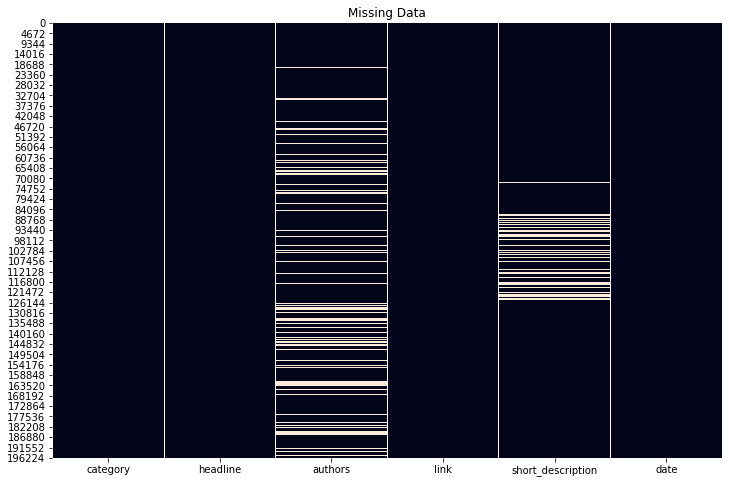

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.eq(''),cbar=False).set(title='Missing Data')

In [11]:
df["year"] = df.date.apply(lambda x: x.year)
df["month"] = df.date.apply(lambda x: x.strftime("%B"))

[Text(0.5, 1, 'Missing Data per Month for each Year')]

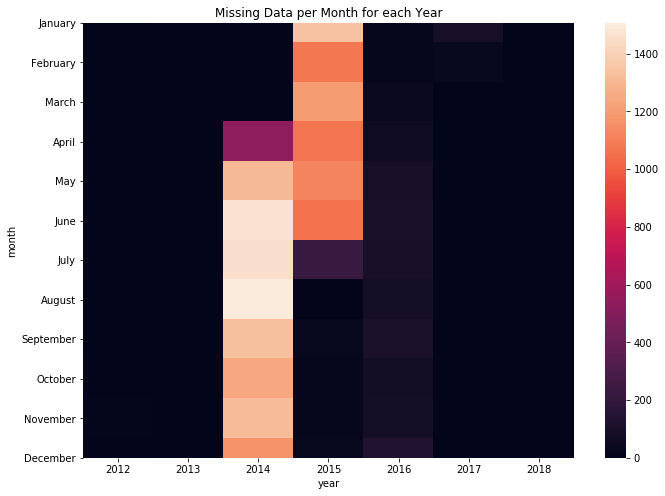

In [12]:
df.loc[df['short_description'] == '', 'missing_short_description'] = 1
df.loc[df['short_description'] != '', 'missing_short_description'] = 0
df['missing_short_description'] = pd.to_numeric(df['missing_short_description'])
pt= pd.pivot_table(df, values='missing_short_description', index=['month'], columns=['year'], aggfunc='sum', fill_value=0 )
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pt = pt.reindex(months, axis=0)
plt.figure(figsize = (11,8))
sns.heatmap(pt, annot=False).set(title='Missing Data per Month for each Year')

In [13]:
print("Links to missing headlines:")
for l in df.loc[df['headline'].eq('')].index:
    print(df.loc[l, 'category'], df.loc[l, 'link'])

Links to missing headlines:
POLITICS https://www.huffingtonpost.com/entry/lincoln-20_b_8023742.html
RELIGION https://www.huffingtonpost.com/entry/post_9671_b_7683632.html
WORLDPOST https://www.huffingtonpost.com/entry/us-and-europes-economic-a_b_6962262.html
BUSINESS https://www.huffingtonpost.com/entry/disney-ceo-iger-readies-m_b_6520290.html
MEDIA https://www.huffingtonpost.com/entry/beverly-hills-hotel-caugh_b_6414708.html
QUEER VOICES https://www.huffingtonpost.com/entry/beverly-hills-hotel-boyco_b_5711931.html


In [14]:
df[(df["headline"] == '') & (df["short_description"] == '')]

,category,headline,authors,link,short_description,date,year,month,missing_short_description
82270,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",https://www.huffingtonpost.com/entry/lincoln-2...,,2015-08-22,2015,August,1.0
95001,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",https://www.huffingtonpost.com/entry/us-and-eu...,,2015-03-29,2015,March,1.0
100426,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/disney-ce...,,2015-01-25,2015,January,1.0
101479,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/beverly-h...,,2015-01-13,2015,January,1.0
113471,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/beverly-h...,,2014-08-28,2014,August,1.0


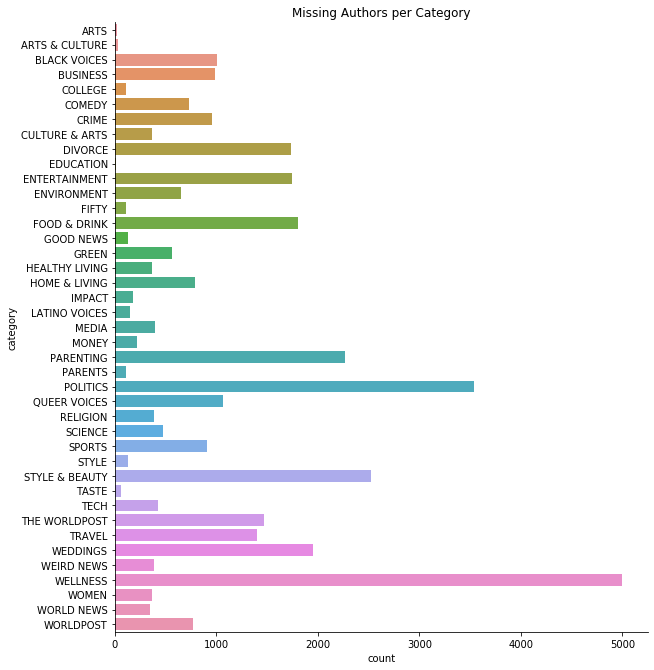

In [15]:
sns.catplot(y="category", kind="count", 
            data=df[df['authors'].eq('')], height=9,
            order = df['category'].sort_values().unique()).set(title='Missing Authors per Category')

### 3. Data Cleansing and Validation <a class="anchor" id="data-clearing"></a>

In [16]:
df = df[df.headline != '']
df = df[df.short_description != '']

In [17]:
df.eq('').sum()

category                         0
headline                         0
authors                      32157
link                             0
short_description                0
date                             0
year                             0
month                            0
missing_short_description        0
dtype: int64

In [18]:
for l in df[df.duplicated(keep=False)]['link']:
    print(l)

https://www.huffingtonpost.comhttp://www.motherjones.com/politics/2016/05/trump-butler-anthony-senecal-facebook-kill-obama
https://www.huffingtonpost.comhttp://www.motherjones.com/politics/2016/05/trump-butler-anthony-senecal-facebook-kill-obama
https://www.huffingtonpost.comhttp://gizmodo.com/former-facebook-workers-we-routinely-suppressed-conser-1775461006
https://www.huffingtonpost.comhttp://gizmodo.com/former-facebook-workers-we-routinely-suppressed-conser-1775461006
https://www.huffingtonpost.comhttp://www.cnbc.com/2016/04/12/on-equal-pay-day-the-gap-is-still-too-wide-commentary.html
https://www.huffingtonpost.comhttp://www.cnbc.com/2016/04/12/on-equal-pay-day-the-gap-is-still-too-wide-commentary.html
https://www.huffingtonpost.comhttp://www.cnn.com/video/data/2.0/video/health/2014/02/07/crossfit-defends-crossfit-orig-jtb.cnn.html
https://www.huffingtonpost.comhttp://www.cnn.com/video/data/2.0/video/health/2014/02/07/crossfit-defends-crossfit-orig-jtb.cnn.html
https://www.huffingt

In [19]:
df[df['link'].str.contains("https://www.huffingtonpost.comhttp")]

,category,headline,authors,link,short_description,date,year,month,missing_short_description
1866,QUEER VOICES,Gay High School Football Player And Swimmer Bo...,,https://www.huffingtonpost.comhttps://www.outs...,Jake Bain and Hunter Sigmund celebrate their r...,2018-04-21,2018,April,0.0
4925,QUEER VOICES,Why These Were The Gayest Winter Olympics In H...,,https://www.huffingtonpost.comhttps://www.outs...,Adam Rippon along with Gus Kenworthy got the l...,2018-02-26,2018,February,0.0
5990,QUEER VOICES,There Have Been At Least 68 LGBTQ Winter Olymp...,,https://www.huffingtonpost.comhttps://www.outs...,"Almost half have been male figure skaters, acc...",2018-02-08,2018,February,0.0
11404,QUEER VOICES,Drag Icon And LGBT Activist Mother Flawless Sa...,,https://www.huffingtonpost.comhttp://www.newno...,The drag community lost a trailblazer with the...,2017-11-19,2017,November,0.0
12935,QUEER VOICES,Asia's Biggest Gay Pride Parade Brings Tens Of...,,https://www.huffingtonpost.comhttps://www.theg...,A sea of rainbow flags and glitzy costumes fil...,2017-10-30,2017,October,0.0
...,...,...,...,...,...,...,...,...,...
200798,STYLE & BEAUTY,"1 Girl, 4 Looks: Meet NYC's Hottest New Model,...",,https://www.huffingtonpost.comhttp://www.refin...,From Refinery29: When we tell you Lily Kwong i...,2012-01-28,2012,January,0.0
200800,WELLNESS,The Sleep Library: 11 Soothing Books For Bedtime,,https://www.huffingtonpost.comhttp://www.oprah...,Do you toss and turn until you finally sit up ...,2012-01-28,2012,January,0.0
200824,QUEER VOICES,"Glenn Close On 'Albert Nobbs', Gender Bending ...",,https://www.huffingtonpost.comhttp://www.windy...,Twenty-four hours before the Golden Globes cer...,2012-01-28,2012,January,0.0
200835,BUSINESS,Walmart Waving Goodbye To Some Greeters,,https://www.huffingtonpost.comhttp://jobs.aol....,"After 30 years, ""People Greeters"" will no long...",2012-01-28,2012,January,0.0


In [20]:
df = df[df["link"].str.contains("https://www.huffingtonpost.comhttp") == False]

In [21]:
print('Dublicated link: ', df['link'].duplicated().sum())
print('Dublicated headlines: ', df['headline'].duplicated().sum())
print('Dublicated short_description: ', df['short_description'].duplicated().sum())
print('Dublicated headlines & short_description: ', df[['headline','short_description']].duplicated().sum())

Dublicated link:  0
Dublicated headlines:  1320
Dublicated short_description:  2721
Dublicated headlines & short_description:  366


### 4. Univariate Analysis <a class="anchor" id="univariate-analysis"></a>

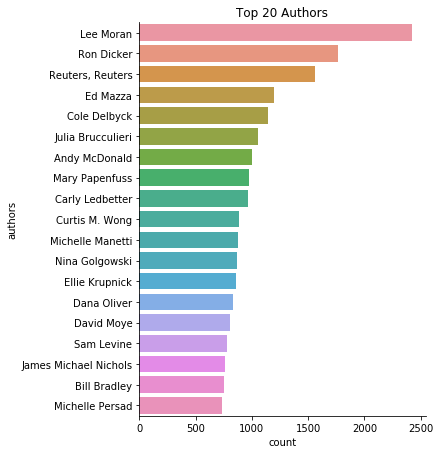

In [22]:
sns.catplot(y="authors",kind="count", height=6, 
            data=df, order=df.authors.value_counts().iloc[1:20].index).set(title='Top 20 Authors')

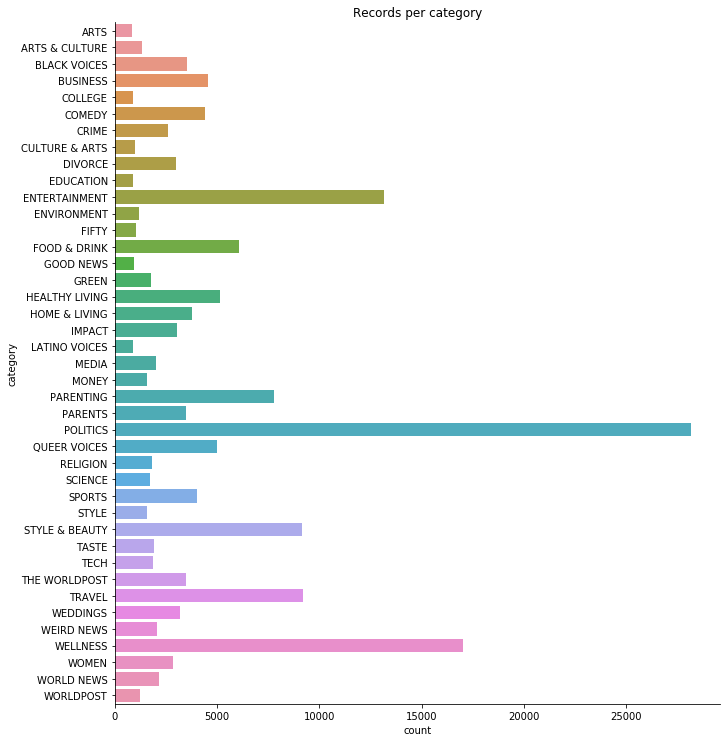

In [23]:
sns.catplot(y="category", kind="count", 
            height = 10, data = df, 
            order = df['category'].sort_values().unique()).set(title='Records per category')

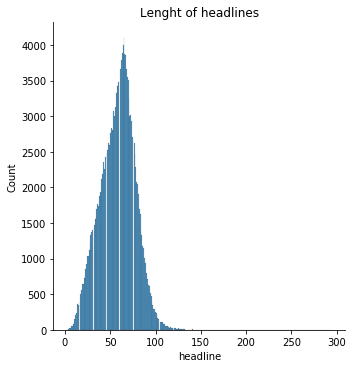

In [24]:
sns.displot(df['headline'].str.len(), 
            kind="hist").set(title='Lenght of headlines')


In [25]:
df_2018 = df[df['year']==2018]

A **word cloud** is a simple and effective visualization of data, in which words are shown in varying sizes depending on how frequent they appear in the text documents. The following word clouds will show what were was important in 2018. 

What were the titles talking about in 2018?


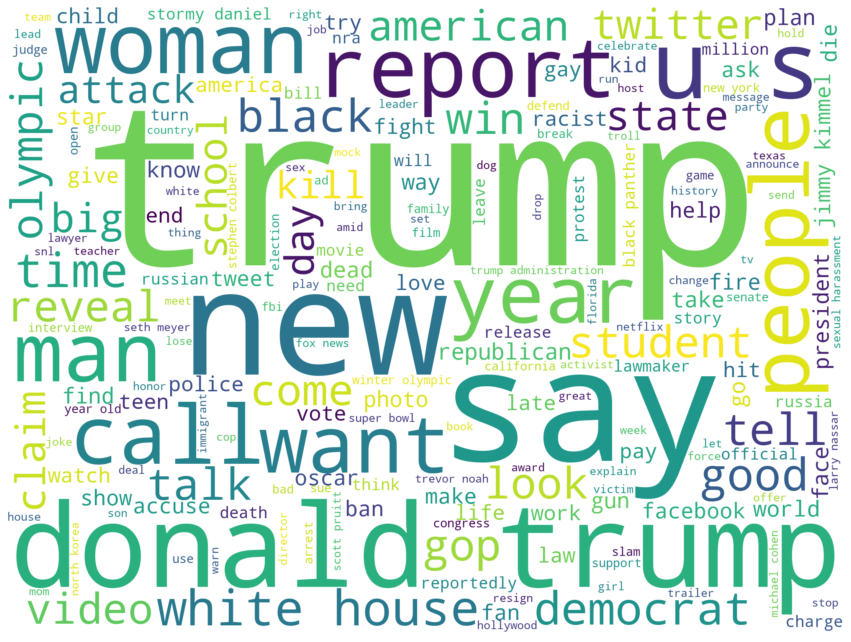

In [26]:
pd.options.mode.chained_assignment = None
df_2018['headline_lemma'] = df_2018.headline.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text.lower()) 
                                                   if not token.is_stop and not token.is_punct))
wordcloud = WordCloud(background_color="white", width=2000,
                     height=1500).generate(" ".join(df_2018['headline_lemma']))
print("What were the titles talking about in 2018?")
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Top nouns in 2018.


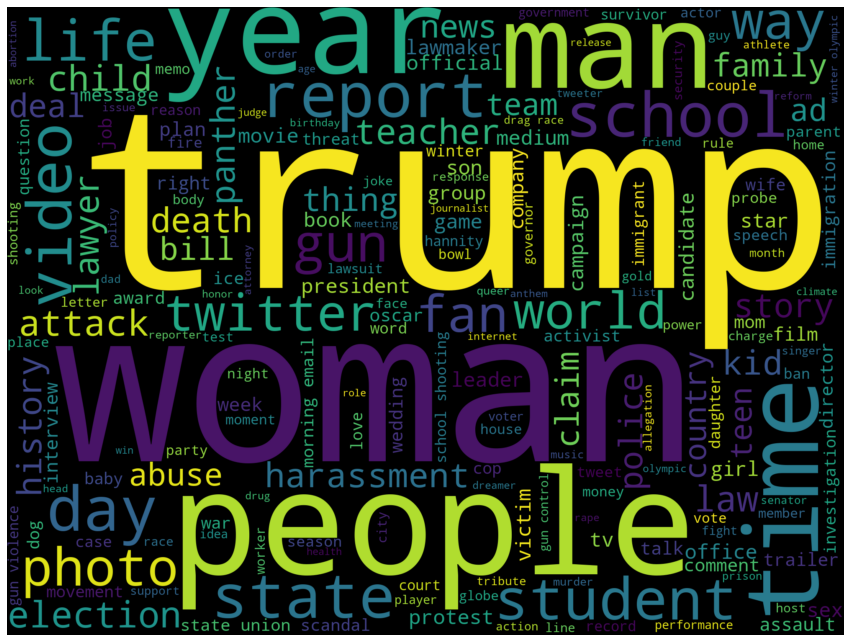

In [27]:
pd.options.mode.chained_assignment = None
df_2018['headline_noun'] = df_2018.headline.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text.lower()) 
                                                   if not token.is_stop and token.pos_ == "NOUN"))
wordcloud = WordCloud(background_color="black", width=2000,
                     height=1500).generate(" ".join(df_2018['headline_noun']))
print("Top nouns in 2018.")
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Top verbs in 2018.


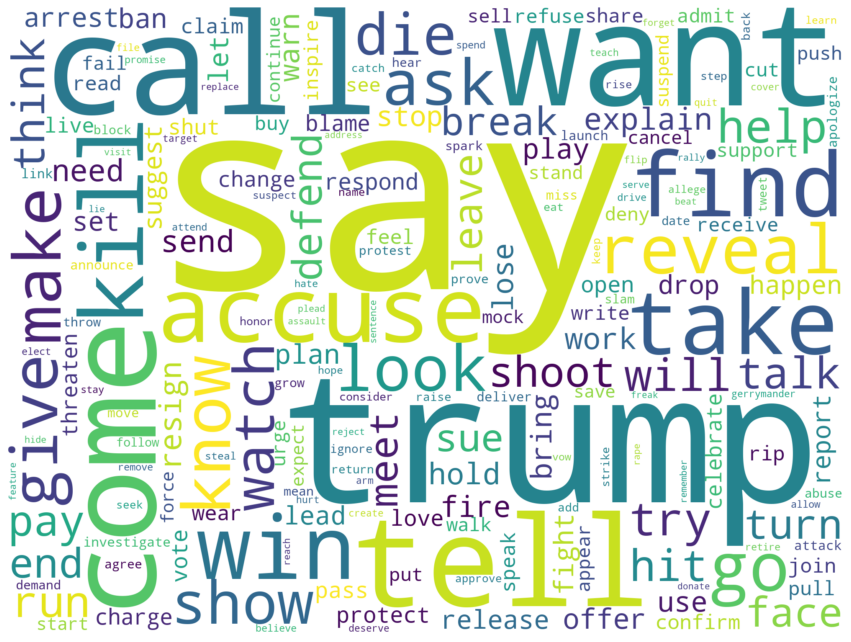

In [28]:
pd.options.mode.chained_assignment = None
df_2018['headline_verb'] = df_2018.headline.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text.lower()) 
                                                   if not token.is_stop and token.pos_ == "VERB"))
wordcloud = WordCloud(background_color="white", width=2000,
                     height=1500).generate(" ".join(df_2018['headline_verb']))
print("Top verbs in 2018.")
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most important names and orgranizations in 2018.


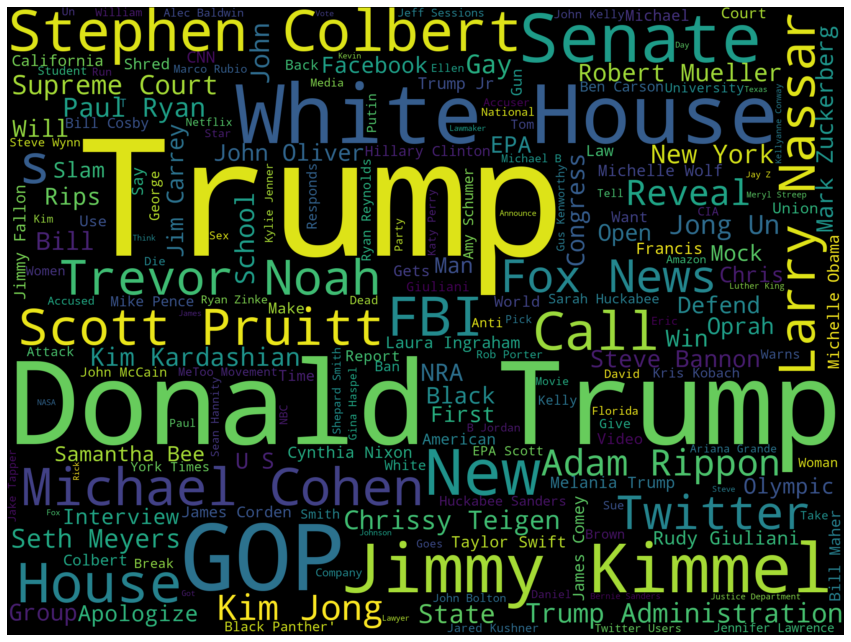

In [29]:
pd.options.mode.chained_assignment = None
df_2018['headline_entity'] = df_2018.headline.apply(lambda text:
                                                    ' '.join([str(x) for x in nlp(text).ents 
                                                          if x.label_ == 'PERSON' or x.label_ == 'ORG']))
wordcloud = WordCloud(background_color="black", width=2000,
                     height=1500).generate(" ".join(df_2018['headline_entity']))
print("Most important names and orgranizations in 2018.")
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 5. Crime and Not Crime <a class="anchor" id="data-crime"></a>

The following code will create a dataset with equal number of records in crime category and a random set of records from the rest categories.

In [30]:
df_crime = df[df['category'] == 'CRIME']
n_crimes = len(df_crime)
print('Total records in CRIME category:', n_crimes)
df_not_crime = df[df['category'] != 'CRIME']
df_not_crime = df_not_crime.take(np.random.permutation(len(df_not_crime))[:n_crimes])
n_nocrime = len(df_not_crime)
print('Total random records not in CRIME category:', n_nocrime)

Total records in CRIME category: 2584
Total random records not in CRIME category: 2584


In [31]:
df_crime = pd.concat([df_crime, df_not_crime])
print('Total records in crime or not dataset:', len(df_crime))

Total records in crime or not dataset: 5168


In [32]:
pd.options.mode.chained_assignment = None
df_crime['crime_lemma'] = df_crime.headline.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text.lower()) 
                                                   if not token.is_stop and not token.is_punct and token.is_alpha))

[Text(0.5, 1.0, 'Most Common Words in Crime Headlines')]

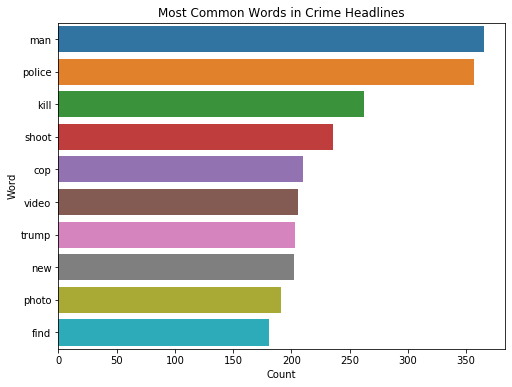

In [33]:
corpus = []
news_headlines = df_crime['crime_lemma'].str.split()
news_headlines = news_headlines.values.tolist()
corpus = [word for i in news_headlines for word in i]
corpus_cnt = Counter(corpus)
freq_word = pd.DataFrame(corpus_cnt.most_common(10), columns = ['Word', 'Count'])
plt.figure(figsize=(8,6))
sns.barplot(y='Word', x='Count', data = freq_word).set(title='Most Common Words in Crime Headlines')

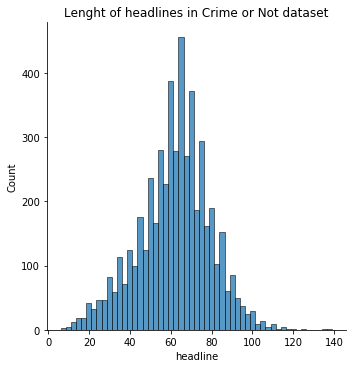

In [34]:
sns.displot(df_crime['headline'].str.len(), 
            kind="hist").set(title='Lenght of headlines in Crime or Not dataset')

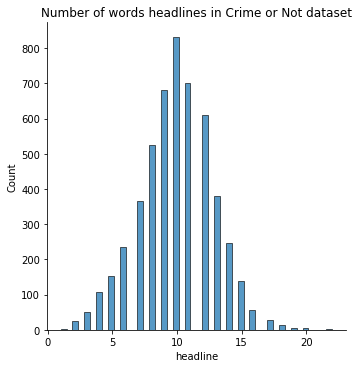

In [35]:
sns.displot(df_crime['headline'].str.split().str.len(), 
            kind="hist").set(title='Number of words headlines in Crime or Not dataset')

The next lines will prepare our training and testing dataset. The data will be split and shuffled in a random way.

In [36]:
df_crime['labels'] = df['category'].apply(lambda x: 1 if x == 'CRIME' else 0)

In [37]:
X = np.array(df_crime['crime_lemma'])
y = np.array(df_crime['labels'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("X train:", X_train.shape)
print("X test:", X_test.shape)
print("y train:", y_train.shape)
print("y test:", y_test.shape)

X train: (4134,)
X test: (1034,)
y train: (4134,)
y test: (1034,)


### 6. Term Frequency–Inverse Document Frequency  <a class="anchor" id="tf-idf"></a>

**Term Frequency (TF)** measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear more frequent in long documents than shorter ones. That is why, the term frequency is often divided by the document length as a way of normalization:

$tf(t) = \frac{ \text{ (Number of times term t appears in a document)} } { \text{(Total number of terms in the document)}}$

**Inverse Document Frequency (IDF)** measures how important a term is. In TF, all terms are considered equally important. However, it is known that certain terms, such as "is", "on", "this", may appear a lot of times but have little importance. That is why we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

$idf(t) = log_e(\frac{ \text{Total number of documents}} { \text{Number of documents with term t in it}})$

$tfidf( t, d, D ) = tf( t, d ) \times idf( t, D )$

In [39]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
X_train_vectorized = vectorizer.transform(X_train)

In [41]:
tf_idf_transformer = TfidfTransformer()
tf_idf_transformer.fit(X_train_vectorized)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [42]:
X_train_tf_idf = tf_idf_transformer.transform(X_train_vectorized)

Preparing the test data:

In [43]:
X_test_vectorized = vectorizer.transform(X_test)
X_test_tf_idf = tf_idf_transformer.transform(X_test_vectorized)

Now that we have our features, we can train a classifier to try to predict if a headline is a crime or not.

### 7. Naive Bayes  <a class="anchor" id="naive-bayes"></a>

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship:

$P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}$

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}\$

Using the naive conditional independence assumption that

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$, for all $i$, this relationship is simplified to:

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:

$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$

$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$

In [44]:
nb_clf = MultinomialNB().fit(X_train_tf_idf, y_train)

In [45]:
predicted = nb_clf.predict(X_test_tf_idf)

In [46]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       515
           1       0.87      0.94      0.90       519

    accuracy                           0.90      1034
   macro avg       0.90      0.90      0.90      1034
weighted avg       0.90      0.90      0.90      1034



The classifer obtained 87% of accuracy out of the box.

In [47]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 441
False Positive: 74
False Negative: 32
True Positive: 487


$\text{Sensitivity} = \frac{TP}{TP + FN}$

In [48]:
print('Sensitivity =', str(tp/float(tp+fn)))

Sensitivity = 0.9383429672447013


$\text{Specifity} = \frac{TN}{TN + FP}$

In [49]:
print('Specifity =', str(tn/float(tn+fp)))

Specifity = 0.8563106796116505


Let's make a test with a simple sentance:

In [50]:
test_str = 'Test this killing text'

In [51]:
def to_lemma(s):
    lemma = [token.lemma_ for token in nlp(s.lower())
             if not token.is_stop and not token.is_punct and token.is_alpha]
    return ' '.join(lemma)

In [52]:
label_dict = {0:'Not a Crime', 1: 'Crime'}

In [53]:
test_str_vectorized = vectorizer.transform([to_lemma(test_str)])
test_str_tf_idf = tf_idf_transformer.transform(test_str_vectorized)
print('Sentence', test_str)
print('Predicted Probaility:', nb_clf.predict_proba(test_str_tf_idf))
print('Predicted:', label_dict[nb_clf.predict(test_str_tf_idf)[0]])


Sentence Test this killing text
Predicted Probaility: [[0.25309881 0.74690119]]
Predicted: Crime


### 8. Long Short-Term Memory <a class="anchor" id="lstm"></a>

**Long short-term memory (LSTM)** is an recurrent neural network (RNN) used in the deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. They are described as following:

**Input Gate:** $i_t=\sigma(W^i x_t+U^i h_{t-1}+b^i)$, which controls how much of the current input $x_t$ and the previous output $h_{t-1}$ will enter into the new cell. 

**Forget Gate:** $f_t=\sigma(W^f x_t+U^f h_{t-1}+b^f)$, which decides whether to set to zero or keep the memory

**Cell Update:** $g_t=\phi(W^g x_t+U^g h_{t-1}+b^g)$, which transforms the input and previous state to be taken into account into the current state.

**Output Gate:** $o_t=\sigma(W_o x_t+U^o h^{t-1}+b^o)$, which is resposible for the output from the cell.

The **Internal State** update is perofrmed by: $s_t=g_t\cdot i_t+s_{t-1}\cdot f_t$, which omputes the current timestep's state using the gated previous state.

**Hidden Layer:** $h_t=s_t\cdot \phi(o_t)$, which outputs of the LSTM scaled by a $\tanh$ transformations of the current state.

<img src="./images/LSTM3-chain.png" style="width:600px;margin-bottom:15px">

<span>Image by <a href="https://colah.github.io/">Colah</a> on <a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/">Understanding LSTM Networks</a></span>.

The raw text loaded by tfds needs to be processed before it can be used in a model. The simplest way to process text for training in Tensorflow 2 is by the use of **tf.experimental.preprocessing.TextVectorization** layer. This layer has many capabilities, but in this notebook I will sticks to the default behavior.

In [54]:
_test = ' '.join(X_test)
VOCAB_SIZE = len(set(_test.split(' ')))
print('Unique words in train set:', VOCAB_SIZE)

Unique words in train set: 3084


In [55]:
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

<img src="./images/bidirectional.png" style="width:600px;margin-bottom:15px">

<span>Image by <a href="https://www.tensorflow.org/">Tensorflow</a> on <a href="https://www.tensorflow.org/tutorials">Tensorflow Tutorials</a></span>.

In [56]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.5, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_dropout=0.5)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [57]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(1e-4),
              metrics=['accuracy'])


In [58]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=1e-8)


In [59]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_test, y_test), 
                    validation_steps=30,
                    callbacks=[reduce_lr])

Epoch 1/15
130/130 [==============================] - 7s 51ms/step - loss: 0.6914 - accuracy: 0.5232 - val_loss: 0.6879 - val_accuracy: 0.5851
Epoch 2/15
130/130 [==============================] - 4s 29ms/step - loss: 0.6761 - accuracy: 0.6372 - val_loss: 0.6560 - val_accuracy: 0.6944
Epoch 3/15
130/130 [==============================] - 4s 30ms/step - loss: 0.6061 - accuracy: 0.7078 - val_loss: 0.5564 - val_accuracy: 0.7718
Epoch 4/15
130/130 [==============================] - 4s 30ms/step - loss: 0.4874 - accuracy: 0.8108 - val_loss: 0.4601 - val_accuracy: 0.8153
Epoch 5/15
130/130 [==============================] - 4s 30ms/step - loss: 0.4015 - accuracy: 0.8628 - val_loss: 0.4019 - val_accuracy: 0.8414
Epoch 6/15
130/130 [==============================] - 4s 30ms/step - loss: 0.3425 - accuracy: 0.8820 - val_loss: 0.3541 - val_accuracy: 0.8743
Epoch 7/15
130/130 [==============================] - 4s 30ms/step - loss: 0.3084 - accuracy: 0.8953 - val_loss: 0.3278 - val_accuracy: 0.8781

In [60]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

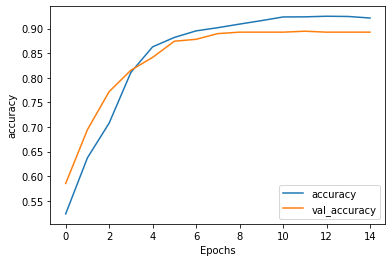

In [61]:
plot_graphs(history, 'accuracy')

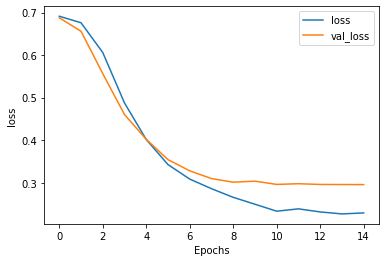

In [62]:
plot_graphs(history, 'loss')

In [63]:
sample_text = ('Is it bad to kill the sad mood?')
prediction = (model.predict(np.array([sample_text]))[0][0] > 0.5).astype("int32")
_label = label_dict[prediction]
print('Sentence:', sample_text)
print('Probability:', prediction)
print('Predicted:', _label)

Sentence: Is it bad to kill the sad mood?
Probability: 1
Predicted: Crime


In [64]:
sample_text = ('It ’s clear Donald Trump is a huge fan of Russian President Vladimir  Putin .')
prediction = (model.predict(np.array([sample_text]))[0][0] > 0.5).astype("int32")
_label = label_dict[prediction]
print('Sentence:', sample_text)
print('Probability:', prediction)
print('Predicted:', _label)

Sentence: It ’s clear Donald Trump is a huge fan of Russian President Vladimir  Putin .
Probability: 0
Predicted: Not a Crime


### 9. Read the Full Story <a class="anchor" id="fullstory"></a>

In [65]:
def get_fullstory(url):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)
    driver.implicitly_wait(2)
    agree_button = driver.find_elements_by_css_selector('button.primary')
    for btn in agree_button:
        btn.click()
    driver.implicitly_wait(2)
    elem = driver.find_elements_by_css_selector('p')
    s = ''
    for el in elem:
        try:
            s = s + el.text
        except:
            continue
    driver.quit() 
    return s

In [66]:
def search_data(data, X, cat, kwrd):
    data = data[ (data['category']==cat) & (data['headline'].str.contains(kwrd, case=False))]
    stories = []
    if len(data) < X:
        X = len(data)
    for x in range(0,X):
        url = data.link.iloc[[x]].values[0]
        print('Obtainig:', url)
        fullstory = get_fullstory(url)
        stories.append(str(fullstory))
    return stories

In [67]:
ar_fullstories = search_data(df_2018, 2, 'POLITICS', 'love')

Obtainig: https://www.huffingtonpost.com/entry/edward-snowden-trump-loves-putin_us_5b08ae41e4b0568a880b7451
 
Obtainig: https://www.huffingtonpost.com/entry/giuliani-tells-washington-post-trump-still-loves-me_us_5aed30abe4b0c4f19322bd59
 


In [68]:
test = df_2018[(df_2018['category']=='POLITICS') & (df_2018['headline'].str.contains('love', case=False))]

In [69]:
test.link.iloc[[1]].values[0]

'https://www.huffingtonpost.com/entry/giuliani-tells-washington-post-trump-still-loves-me_us_5aed30abe4b0c4f19322bd59'

In [70]:
ar_fullstories[1]

'Former New York City mayor Rudy Giuliani was still pedaling as fast as he could to bring his version of the Stormy Daniels payment saga in line with President Donald Trump’s — but he also insisted that the president was not angry with him. “He said he loves me,” Giuliani told The Washington Post.Trump’s lead attorney told the Post in an interview Friday evening that he and the president had a long conversation about Giuliani’s surprise Stormy Daniels reveal on Fox News, adding: “We wanted to get everyone on the same page.”Giuliani previously told Fox host Sean Hannity Wednesday that Trump reimbursed the $130,000 in payment that Trump’s attorney Michael Cohen gave to the adult film star. Stormy Daniels, whose real name is Stephanie Clifford, has maintained that she had an affair with Trump and that she was paid hush money. Trump has insisted in the past he knew nothing about the payment.The president initially appeared to support Giuliani’s version of events in tweets Thursday, but the

### 10. Who is involved? <a class="anchor" id="involved"></a>

In [71]:
def get_persons_entities(text_story):

    ar_sentances = text_story.split('.')
    entities = set()
    for sentace in ar_sentances:
        for token in nlp(sentace).ents:
            if token.label_ == 'PERSON':
                entities.add(token.text)
    return entities

In [72]:
entities_story = get_persons_entities(ar_fullstories[0])

In [73]:
print(entities_story)

{'Putin', 'Snowden', 'Mueller', 'Vladimir Putin', 'Edward Snowden', 'Robert Mueller', 'Donald Trump'}


In [74]:
ar_sentances = ar_fullstories[0].split('.')
displacy.render(nlp(ar_sentances[0]), style="ent")

In [75]:
displacy.render(nlp(ar_sentances[0]), style="dep", jupyter=True, options={'distance':140})

### 11. Investigation with Naive Bayes <a class="anchor" id="crime-naive"></a>

Now, let's check each sentence with the Naive Bayes classifier and use the probability of the 'crime' class as alpha (transparent) channel of the red color.

In [76]:
def colorize_text(s, alpha):
    return '<span style="font-size:85%;background-color:rgba(255, 99, 71,{}")>{}</span>'.format(alpha, s)

In [77]:
text_sentences = nlp(ar_fullstories[0])
html_story = '';
for sentence in text_sentences.sents:
    pred_str_vectorized = vectorizer.transform([to_lemma(sentence.text)])
    pred_str_tf_idf = tf_idf_transformer.transform(pred_str_vectorized)
    crime_probability = nb_clf.predict_proba(pred_str_tf_idf)
    alpha = crime_probability[0][1]
    html_story = html_story + colorize_text(sentence, alpha)

In [78]:
html_print(html_story)

<img src="./images/result1.png" style="margin-bottom:15px">
<span>Image generated by html_print and print screened (due to github security rules)</span>.

The result could be a little bit misleading, because it also highlights sentences where the probability of the ‘not crime’ class is larger than 50%.  So, let’s see now the same text, but highlighted only when the probability of a ‘crime’ is larger than 50%. 

In [79]:
text_sentences = nlp(ar_fullstories[0])
html_story = '';
for sentence in text_sentences.sents:
    pred_str_vectorized = vectorizer.transform([to_lemma(sentence.text)])
    pred_str_tf_idf = tf_idf_transformer.transform(pred_str_vectorized)
    crime_probability = nb_clf.predict_proba(pred_str_tf_idf)
    if np.argmax(crime_probability[0]) == 1:
        alpha = crime_probability[0][1]
    else:
        alpha = 0
    html_story = html_story + colorize_text(sentence, alpha)

In [80]:
html_print(html_story)

<img src="./images/result2.png" style="margin-bottom:15px">
<span>Image generated by html_print and print screened (due to github security rules)</span>.

### 12. Results with LSTM  <a class="anchor" id="results-lstm"></a>

In [81]:
text_sentences = nlp(ar_fullstories[0])
html_story = '';
for sentence in text_sentences.sents:
    if len(to_lemma(sentence.text)) == 0:
        continue
    crime_probability = model.predict(np.array([to_lemma(sentence.text)]))
    alpha = crime_probability[0][0]
    html_story = html_story + colorize_text(sentence, alpha)

In [82]:
html_print(html_story)

<img src="./images/result3.png" style="margin-bottom:15px">
<span>Image generated by html_print and print screened (due to github security rules)</span>.

One again, the above text highlights the probability in of a ‘crime’, without considering if it is smaller than 50%. However, compared with Naïve Bayes classifier, the result from the LSTM network is way much confident in its predictions. 

In [83]:
text_sentences = nlp(ar_fullstories[0])
html_story = '';
for sentence in text_sentences.sents:
    if len(to_lemma(sentence.text)) == 0:
        continue
    crime_probability = model.predict(np.array([to_lemma(sentence.text)]))
    alpha = crime_probability[0][0]
    if crime_probability[0][0] > 0.5:
        alpha = crime_probability[0][0]
    else:
        alpha = 0
    html_story = html_story + colorize_text(sentence, alpha)

In [84]:
html_print(html_story)

<img src="./images/result4.png" style="margin-bottom:15px">
<span>Image generated by html_print and print screened (due to github security rules)</span>.

At the end it is worth noting, that in this notebook was used a relatively simple way for tokenizing the text.  The results could be much better if instead of **uni-grams**, the text is vectorized with **bi-grams** (or other n-grams). Moreover, a technique such as **word2vec** will allow the LSTM to correctly 'recognize' much more complex sentences. Additionally, the hyper-parameters of the LSTM could be further optimized. All this leaves significant amount of space for improvement in both methods presented in this notebook. 